<a href="https://www.kaggle.com/code/mh0386/digit-recognizer" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
try:
    train = pd.read_csv('Data/train.csv')
    test = pd.read_csv('Data/test.csv')
except:
    train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
    test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = np.array(test)
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
y = train['label']
X = train.drop('label', axis=1)

In [6]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
X = X/255
test = test/255

In [9]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
h = model.fit(
    X, 
    y, 
    epochs=40,
    validation_split=0.2
)

Epoch 1/40
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3269 - accuracy: 0.9082 - val_loss: 0.1850 - val_accuracy: 0.9455
Epoch 2/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1506 - accuracy: 0.9566 - val_loss: 0.1495 - val_accuracy: 0.9535
Epoch 3/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1034 - accuracy: 0.9702 - val_loss: 0.1197 - val_accuracy: 0.9642
Epoch 4/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.1038 - val_accuracy: 0.9687
Epoch 5/40
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0982 - val_accuracy: 0.9702
Epoch 6/40
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0952 - val_accuracy: 0.9708
Epoch 7/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0350 - accuracy: 0.9897 - val_loss: 0.0989 - val_accuracy:

In [12]:
y_pred = model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [13]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [14]:
model.evaluate(test, y_pred)

875/875 [==============================] - 2s 2ms/step - loss: 0.0087 - accuracy: 1.0000


[0.008722232654690742, 1.0]

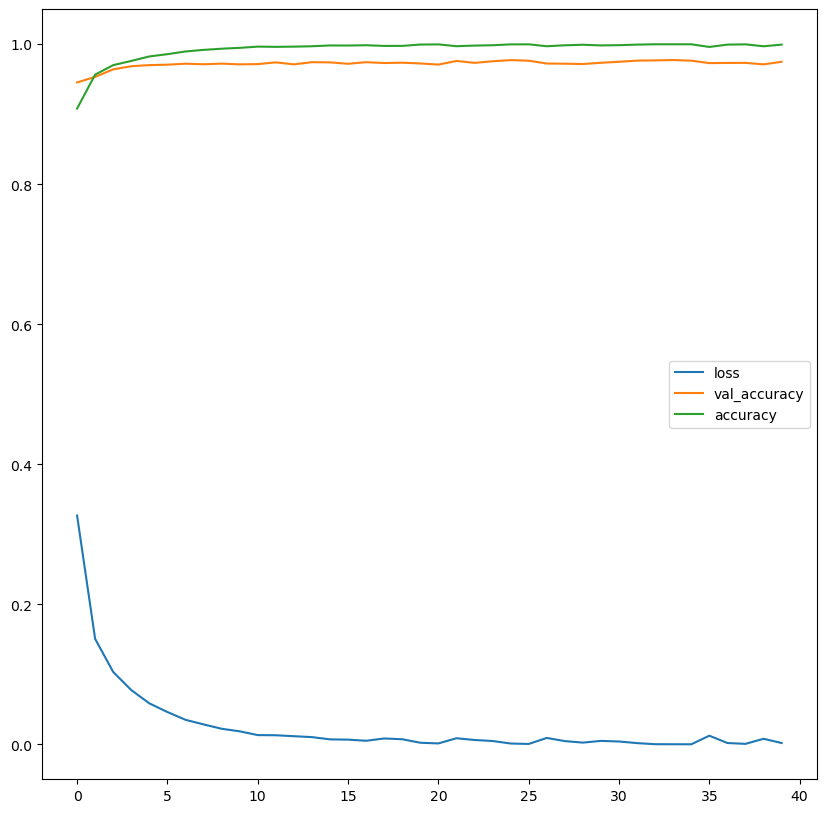

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(h.history['loss'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['accuracy'])
plt.legend(['loss', 'val_accuracy', 'accuracy'])
plt.show()

In [16]:
submission = pd.DataFrame(
    {
        'ImageId': range(1, len(y_pred) + 1),
        'Label': y_pred
    }
)
submission.to_csv('submission.csv', index=False)

In [19]:
model.save('Model/model.keras')